In [1]:
import pandas as pd

In [2]:
acm = pd.read_csv('ACM.csv')
acm.drop(acm.columns[acm.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
acm.head(5)

,id,author,abstract,booktitle,title,year,volume,number,pages,keywords,doi,ISSN,months,isbn,publisher,address,url,numpages,location,series
0,10.1145/2384716.2384763,Shams Imam,"We present CnC-Python (CP), an approach to imp...",Proceedings of the 3rd Annual Conference on Sy...,CnC-Python: Multicore Programming with High Pr...,2012,NaN,NaN,111–112,"cnc-python, parallel programming, concurrent c...",10.1145/2384716.2384763,NaN,NaN,9781450315630,Association for Computing Machinery,"New York, NY, USA",https://doi.org/10.1145/2384716.2384763,2,"Tucson, Arizona, USA",SPLASH '12
1,10.1145/2635648.2635660,"Pedro Ramos, Antonio Leitao","Racket is a descendant of Scheme, a language t...",Proceedings of ILC 2014 on 8th International L...,Reaching Python from Racket,2014,NaN,NaN,32–38,"Interoperability, Racket, Python",10.1145/2635648.2635660,NaN,NaN,9781450329316,Association for Computing Machinery,"New York, NY, USA",https://doi.org/10.1145/2635648.2635660,7,"Montreal, QC, Canada",ILC '14
2,10.5555/2188385.2343710,"Tom De Smedt, Walter Daelemans",Pattern is a package for Python 2.4+ with func...,NaN,Pattern for Python,2012,13.0,NaN,2063–2067,"python, data mining, machine learning, graph n...",NaN,1532-4435,June,NaN,JMLR.org,NaN,NaN,5,NaN,NaN
3,10.1145/611892.611996,"Douglas Blank, Lisa Meeden, Deepak Kumar","This paper describes Pyro, a robotics programm...",Proceedings of the 34th SIGCSE Technical Sympo...,Python Robotics: An Environment for Exploring ...,2003,NaN,NaN,317–321,"robotics, pedagogy, python",10.1145/611892.611996,NaN,NaN,158113648X,Association for Computing Machinery,"New York, NY, USA",https://doi.org/10.1145/611892.611996,5,"Reno, Navada, USA",SIGCSE '03
4,10.1145/792548.611996,"Douglas Blank, Lisa Meeden, Deepak Kumar","This paper describes Pyro, a robotics programm...",NaN,Python Robotics: An Environment for Exploring ...,2003,35.0,1.0,317–321,"python, robotics, pedagogy",10.1145/792548.611996,0097-8418,January,NaN,Association for Computing Machinery,"New York, NY, USA",https://doi.org/10.1145/792548.611996,5,NaN,NaN


In [3]:
acm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         58 non-null     object 
 1   author     58 non-null     object 
 2   abstract   58 non-null     object 
 3   booktitle  46 non-null     object 
 4   title      58 non-null     object 
 5   year       58 non-null     int64  
 6   volume     12 non-null     float64
 7   number     11 non-null     float64
 8   pages      47 non-null     object 
 9   keywords   57 non-null     object 
 10  doi        54 non-null     object 
 11  ISSN       12 non-null     object 
 12  months     12 non-null     object 
 13  isbn       43 non-null     object 
 14  publisher  58 non-null     object 
 15  address    50 non-null     object 
 16  url        54 non-null     object 
 17  numpages   58 non-null     int64  
 18  location   46 non-null     object 
 19  series     46 non-null     object 
dtypes: float64(2

In [4]:
acm['numpages'].describe()

count    58.000000
mean      6.965517
std       4.499378
min       1.000000
25%       5.000000
50%       6.000000
75%       8.750000
max      25.000000
Name: numpages, dtype: float64

In [5]:
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

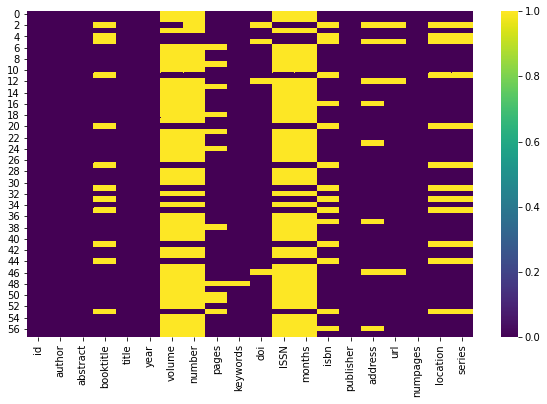

In [6]:
fig_dims = (10, 6)

fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.heatmap(acm.isnull(),cmap='viridis',cbar='true')


In [7]:
acm = acm.drop(['number', 'volume','ISSN','months'], axis=1)

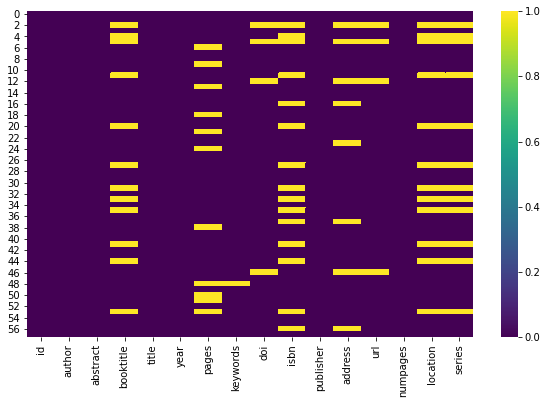

In [8]:
fig_dims = (10, 6)

fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.heatmap(acm.isnull(),cmap='viridis',cbar='true')


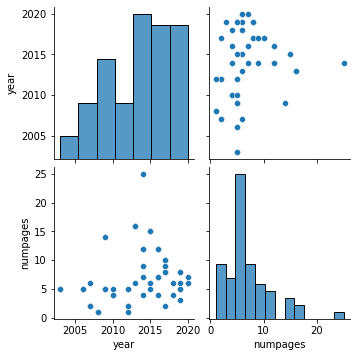

In [9]:
sns.pairplot(acm) 

In [10]:
import matplotlib.pyplot as plt

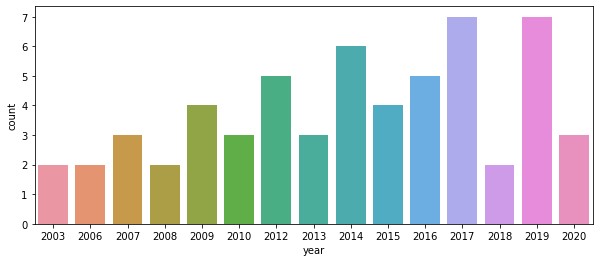

In [11]:
#sns.set_theme(style="darkgrid")
#ax = sns.countplot(x="year", data=acm)
fig_dims = (10, 4)

fig, ax = plt.subplots(figsize=fig_dims)

#sns.barplot(x = "year", y = "count", ax=ax, data=df)
sns.countplot(x="year", ax=ax, data=acm)

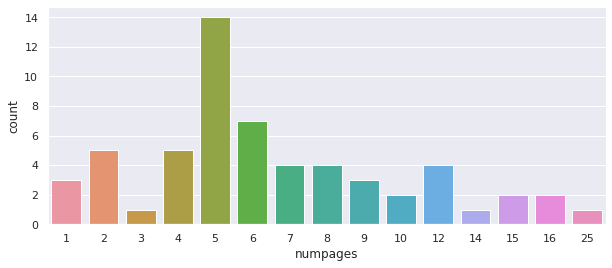

In [12]:
sns.set_theme(style="darkgrid")
fig_dims = (10, 4)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="numpages",ax=ax, data=acm)

In [13]:
acm['keywords'] = acm['keywords'].str.upper()

In [14]:
df=acm
df['keywords'] = df['keywords'].astype(str)
count=df.keywords.apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0)
count.to_csv('keyword.csv')

In [15]:
df['author']=df['author'].astype(str)
count_auth=df.author.apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0)
count_auth.to_csv('author.csv')

In [16]:
auth = pd.read_csv('author.csv')
keyword = pd.read_csv('keyword.csv')

In [17]:
auth.rename( columns={'Unnamed: 0':'authors'}, inplace=True )
auth.rename( columns={'0':'no of publications'}, inplace=True )
auth.head(150)

,authors,no of publications
0,Shams Imam,1.0
1,Pedro Ramos,1.0
2,Antonio Leitao,1.0
3,Walter Daelemans,2.0
4,Tom De Smedt,2.0
...,...,...
123,Yijia Huang,1.0
124,Sumon Biswas,1.0
125,Antoine Mine,1.0
126,Abdelraouf Ouadjaout,1.0


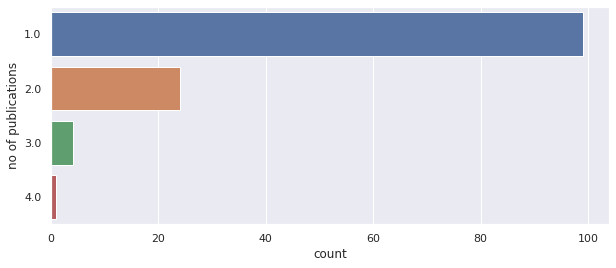

In [18]:
sns.set_theme(style="darkgrid")
fig_dims = (10, 4)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y="no of publications",ax=ax, data=auth)

In [19]:
keyword.rename( columns={'Unnamed: 0':'words'}, inplace=True )
keyword.rename( columns={'0':'keyword counts'}, inplace=True )
keyword.head()

,words,keyword counts
0,CNC-PYTHON,1.0
1,PARALLEL PROGRAMMING,1.0
2,PYTHON,36.0
3,CONCURRENT COLLECTIONS,1.0
4,RACKET,1.0


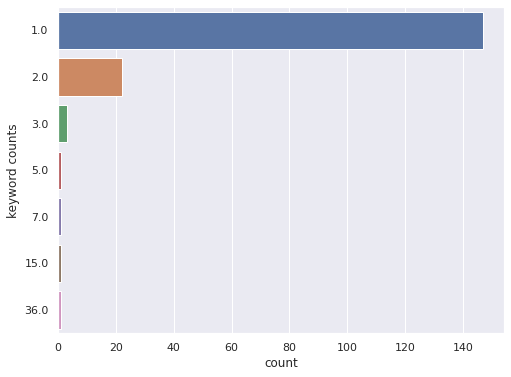

In [20]:
sns.set_theme(style="darkgrid")
fig_dims = (8, 6)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y="keyword counts",ax=ax, data=keyword)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f463776bc50>],
      dtype=object)

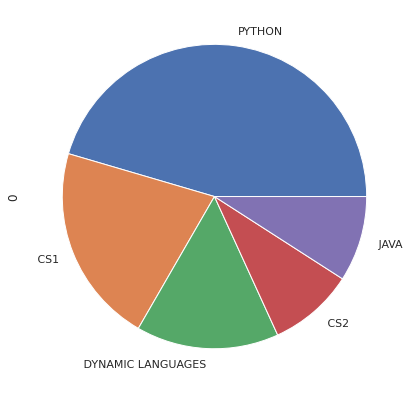

In [21]:
df = pd.DataFrame()
df = pd.read_csv('keyword.csv', sep=',')
df.head(5)
pie_data = df.groupby(['Unnamed: 0'])['0'].agg('sum')
sorted_pie_data = pie_data.sort_values(ascending=False)
sorted_pie_data[1:6].plot.pie(subplots=True,figsize=(12,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f463776bc18>],
      dtype=object)

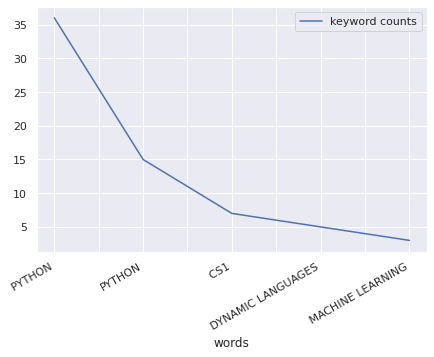

In [22]:
linedata = keyword
ld = linedata.sort_values(by=['keyword counts'], ascending=False)
ld[:5].plot.line(x = 'words', y = 'keyword counts', subplots=True, figsize=(7, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f46376b9940>],
      dtype=object)

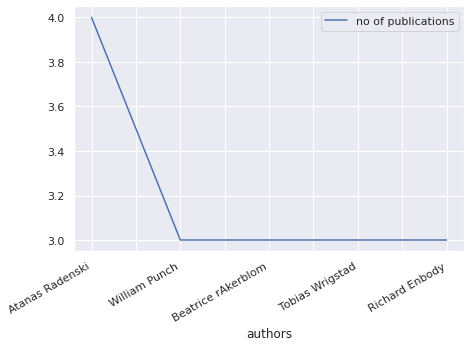

In [23]:
authdata = auth
ad = authdata.sort_values(by=['no of publications'], ascending=False)
ad[:5].plot.line(x = 'authors', y = 'no of publications', subplots=True, figsize=(7, 5))